# Import libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import our libraries

In [2]:
from practicum_utils import get_loggi_files, global_connect, run_query, explained_time, careful_query

# Connect to configured DB

In [3]:
db = global_connect()

# Ready to query the DB

## Run query without time auditing

In [4]:
run_query("""SELECT COUNT(1) FROM itineraries""")

,count
0,33415


## Return estimated time cost for sql server in micro seconds

In [5]:
explained_time("""SELECT COUNT(1) FROM itineraries""")

1507.69

## Taking care of query time consumption

In [6]:
# If query can not be executed in less than 0.1 second, the query is not executed
careful_query("""SELECT COUNT(1) FROM availabilities""", max_seconds=0.1)

This query will take to much time: 0.47160538 seconds
You could try increasing max_seconds for careful_query


In [7]:
# By default, max_seconds = 5
careful_query("""SELECT COUNT(1) FROM availabilities""")

,count
0,21525187


# Building our queries
We need to be clever on this. You will need to define in your practicum config file your connection details.  
It could be better to start against a local connection before working against the cloud.  
But at least the careful_query method will help us to avoid time consuming queries.  
It is up to you to take care of the row limit.  
We know that table itineraries contains less than 35K row, so the next one is a valid query.

In [8]:
df = careful_query("""
SELECT DATE(created), COUNT(1),
        SUM(CASE WHEN status = 'finished' THEN 1 ELSE 0	END) as s_finished,
        SUM(CASE WHEN status != 'finished' THEN 1 ELSE 0 END) as s_notfinished,
        SUM(CASE WHEN status = 'dropped' THEN 1 ELSE 0 END) as s_dropped
FROM ITINERARIES
GROUP BY DATE(created)
ORDER BY DATE(created)
""")

In [9]:
df

,date,count,s_finished,s_notfinished,s_dropped
0,2019-10-01,52,52,0,0
1,2019-10-02,67,67,0,0
2,2019-10-03,121,121,0,0
3,2019-10-04,43,43,0,0
4,2019-10-07,164,159,5,2
...,...,...,...,...,...
136,2020-03-06,330,309,21,8
137,2020-03-09,425,349,76,58
138,2020-03-10,293,279,14,0
139,2020-03-11,374,364,10,0


In [10]:
df.date = pd.to_datetime(df.date)

In [11]:
df.set_index(df.date, inplace=True)

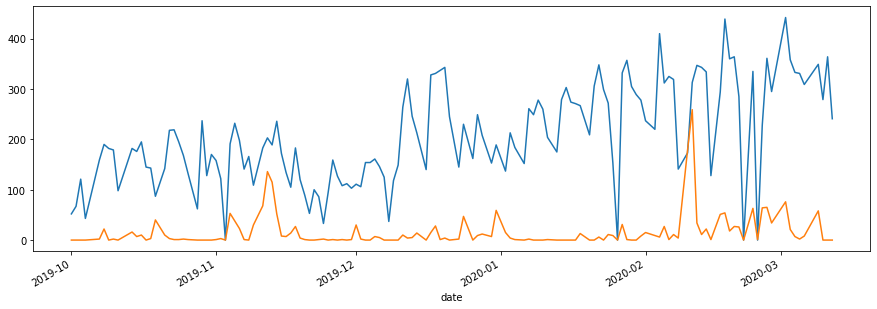

In [12]:
df['s_finished'].plot(figsize=(15,5))
df['s_dropped'].plot(figsize=(15,5))

# Now we have some tools to start our EDA!